# Model 1
## Logistic regression with scikit learn

### Libraries

In [2]:
import glob

import numpy as np
from sklearn import linear_model
from PIL import Image
import matplotlib.pyplot as plt
import pickle

### Read images function

In [17]:
def ReadImages(path, get_labels=True):
	'''
	This functions read all images from a folder (using PIL library) and return them as a numpy array.
	All images are resized to 32x32 pixels, in accordance with the LeNet 5 structure.

	@path: Path where the images are store
	@get_labels: Ween set to True, the function will try to get the label from the image name (the digits after the last _ chatacter). 

	return a numpy array for the images and another one for the labels (in case it is necessary)
	'''
    
	#Complete the path in case is incomplete
	if path[-1] != '/':
		path += '/'

	#Read images from folder        
	images_paths = glob.glob(path+'*.ppm')
	print(len(images_paths), "images found on folder")

	#Initialize lists    
	images = []
	labels = []

	#Loop around all images on the folder  
	print("Reading images...")
	cont = 0
	for image_path in images_paths:
		#Open image with PIL        
		image = Image.open(image_path)
		#Resize Image        
		image = image.resize((32,32))
		#Convert image to array and normilize.
		#Append the image to the images list        
		images.append(np.array(image.getdata()).reshape(-1)/255)

		#If get_labels is set to True, get the image label        
		if get_labels:
			pos1 = image_path.rfind('_')+1 #Find the position of the last _ character
			pos2 = image_path.find('.', pos1) #Find the position of the . character
			labels.append(int(image_path[pos1:pos2])) #Get the label and append it to the labels list

		cont += 1 #Increase counter
		#If the counter is a multiple of 1000, print        
		if cont%10000 == 0:
			print(cont, "/", len(images_paths))	

	#Convert images list to numpy array            
	images = np.asarray(images)
	labels = np.asarray(labels)

	#If get_labels is set to True, return images and labels, otherwise returns just images    
	if get_labels:
		return images, labels
	else:
		return images	

**Example:**

In [27]:
ReadImages('../images/train/')

66232 images found on folder
Reading images...
10000 / 66232
20000 / 66232
30000 / 66232
40000 / 66232
50000 / 66232
60000 / 66232


(array([[0.1372549 , 0.18039216, 0.25490196, ..., 0.09019608, 0.11372549,
         0.14901961],
        [0.13333333, 0.12941176, 0.12941176, ..., 0.11372549, 0.10588235,
         0.10588235],
        [0.10196078, 0.09019608, 0.09803922, ..., 0.2627451 , 0.32156863,
         0.34117647],
        ...,
        [0.04313725, 0.04313725, 0.05490196, ..., 0.05098039, 0.05098039,
         0.0627451 ],
        [0.84705882, 0.85098039, 0.88235294, ..., 0.60392157, 0.65490196,
         0.68235294],
        [0.09803922, 0.08235294, 0.08627451, ..., 0.08235294, 0.07843137,
         0.09411765]]), array([12, 31, 12, ..., 38, 13, 31]))

### Model Function

In [21]:
def model1(c_type, image_path):
	'''
	This model identify what operation is goind to be perform with the model3 (train, test or infer) and call the a function in accordance.
	@c_type: Operation type. It could be train, test or infer
	@image_path: Path to the images folder
	'''

	model_path = '../models/model1/saved/logistic_regression_sklearn.pkl' #Path where the model is saved

	if c_type == 'train':
		#Call ReadImages function
		X, Y = ReadImages(image_path)

		print("Training...")

		#Create an object of type SGDClassifier.
		#The loss attribute is set to 'log' in order to get a logistic regression
		#The attribute shuffle is set to True in order to shuffle the images
		#The attribute verbose is set to 1 in order to for the model to output the progress.
		logistic = linear_model.SGDClassifier(loss='log', shuffle=True, verbose=1)
		
		#Call the trianing function
		logistic.fit(X, Y)
		print("Done.")

		#Print the accuracy
		print("Accuracy:", logistic.score(X, Y))

		#Save model as a pkl
		pickle.dump(logistic, open(model_path, 'wb'))

	elif c_type == 'test':	
		#Call ReadImages function
		Xtest, Ytest = ReadImages(image_path)

		#Load the regression model
		file = open(model_path,'rb')
		logistic = pickle.load(file)

		#Print the accuracy
		print("Accuracy:", logistic.score(Xtest, Ytest))

	elif c_type == 'infer':	
		
		#Load the regression model
		file = open(model_path,'rb')
		logistic = pickle.load(file)

		#Call ReadImages function
		images_paths = ReadImages(image_path, False)
		for i in range(0, len(images_paths), 9):

			subplot_images = images_paths[i:i+9]
			index = 0
			for image in subplot_images:
				index += 1
				plt.subplot(3,3,index)
				result = logistic.predict([image])
				plt.title("Class "+str(result[0]))
				plt.axis('off')
				plt.imshow(image.reshape(32,32,-1))

			plt.show()

			inputted = input("Continue? (y/n)")
			if inputted.lower() != 'y':
				break


**Example 1:** Train

In [18]:
model1('train', '../images/train/')

66232 images found on folder
Reading images...
10000 / 66232
20000 / 66232
30000 / 66232
40000 / 66232
50000 / 66232
60000 / 66232
Training...


/home/xps/Desktop/VirtualEnvs/Kiwi/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 97.88, NNZs: 3072, Bias: -95.790367, T: 66232, Avg. loss: 4.734101
Total training time: 1.10 seconds.
-- Epoch 2
Norm: 68.80, NNZs: 3072, Bias: -86.689643, T: 132464, Avg. loss: 0.262355
Total training time: 2.27 seconds.
-- Epoch 3
Norm: 56.04, NNZs: 3072, Bias: -81.360325, T: 198696, Avg. loss: 0.146747
Total training time: 3.66 seconds.
-- Epoch 4
Norm: 48.73, NNZs: 3072, Bias: -77.586953, T: 264928, Avg. loss: 0.099264
Total training time: 4.91 seconds.
-- Epoch 5
Norm: 44.97, NNZs: 3072, Bias: -74.273371, T: 331160, Avg. loss: 0.081220
Total training time: 6.12 seconds.
-- Epoch 1
Norm: 102.97, NNZs: 3072, Bias: -73.347022, T: 66232, Avg. loss: 7.414240
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 73.02, NNZs: 3072, Bias: -54.538827, T: 132464, Avg. loss: 0.842543
Total training time: 1.22 seconds.
-- Epoch 3
Norm: 58.57, NNZs: 3072, Bias: -42.664011, T: 198696, Avg. loss: 0.467179
Total training time: 1.85 seconds.
-- Epoch 4
Norm: 49.48, NNZs: 3072, Bias:

Norm: 28.34, NNZs: 3072, Bias: -12.667840, T: 331160, Avg. loss: 0.036003
Total training time: 3.32 seconds.
-- Epoch 1
Norm: 71.73, NNZs: 3072, Bias: -66.420135, T: 66232, Avg. loss: 2.097370
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 45.95, NNZs: 3072, Bias: -59.973026, T: 132464, Avg. loss: 0.075760
Total training time: 1.38 seconds.
-- Epoch 3
Norm: 36.79, NNZs: 3072, Bias: -55.381824, T: 198696, Avg. loss: 0.056042
Total training time: 1.96 seconds.
-- Epoch 4
Norm: 32.39, NNZs: 3072, Bias: -51.977605, T: 264928, Avg. loss: 0.042084
Total training time: 2.61 seconds.
-- Epoch 5
Norm: 29.34, NNZs: 3072, Bias: -49.317833, T: 331160, Avg. loss: 0.038628
Total training time: 3.19 seconds.
-- Epoch 1
Norm: 98.90, NNZs: 3072, Bias: -86.868747, T: 66232, Avg. loss: 5.179880
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 69.46, NNZs: 3072, Bias: -68.165943, T: 132464, Avg. loss: 0.446637
Total training time: 1.30 seconds.
-- Epoch 3
Norm: 56.51, NNZs: 3072, Bias: -56.130579,

Norm: 24.32, NNZs: 3072, Bias: -1.093015, T: 264928, Avg. loss: 0.010656
Total training time: 3.35 seconds.
-- Epoch 5
Norm: 20.41, NNZs: 3072, Bias: -1.381127, T: 331160, Avg. loss: 0.006449
Total training time: 3.96 seconds.
-- Epoch 1
Norm: 93.12, NNZs: 3072, Bias: -46.378164, T: 66232, Avg. loss: 4.599971
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 59.93, NNZs: 3072, Bias: -28.469970, T: 132464, Avg. loss: 0.236900
Total training time: 1.56 seconds.
-- Epoch 3
Norm: 45.71, NNZs: 3072, Bias: -18.814941, T: 198696, Avg. loss: 0.104280
Total training time: 2.47 seconds.
-- Epoch 4
Norm: 37.22, NNZs: 3072, Bias: -12.243124, T: 264928, Avg. loss: 0.055418
Total training time: 3.31 seconds.
-- Epoch 5
Norm: 31.24, NNZs: 3072, Bias: -8.357260, T: 331160, Avg. loss: 0.031744
Total training time: 4.15 seconds.
-- Epoch 1
Norm: 93.93, NNZs: 3072, Bias: -4.357606, T: 66232, Avg. loss: 5.630210
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 62.21, NNZs: 3072, Bias: -3.714565, T: 1

Norm: 44.78, NNZs: 3072, Bias: -32.536449, T: 198696, Avg. loss: 0.092418
Total training time: 2.01 seconds.
-- Epoch 4
Norm: 37.87, NNZs: 3072, Bias: -26.465462, T: 264928, Avg. loss: 0.056145
Total training time: 2.64 seconds.
-- Epoch 5
Norm: 33.16, NNZs: 3072, Bias: -22.301680, T: 331160, Avg. loss: 0.040046
Total training time: 3.43 seconds.
-- Epoch 1
Norm: 62.22, NNZs: 3072, Bias: 17.480477, T: 66232, Avg. loss: 1.724503
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 36.15, NNZs: 3072, Bias: 8.487442, T: 132464, Avg. loss: 0.025209
Total training time: 1.32 seconds.
-- Epoch 3
Norm: 25.87, NNZs: 3072, Bias: 5.239040, T: 198696, Avg. loss: 0.007263
Total training time: 1.97 seconds.
-- Epoch 4
Norm: 20.72, NNZs: 3072, Bias: 3.420480, T: 264928, Avg. loss: 0.006361
Total training time: 2.62 seconds.
-- Epoch 5
Norm: 17.52, NNZs: 3072, Bias: 2.333997, T: 331160, Avg. loss: 0.004805
Total training time: 3.26 seconds.
Done.


[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:  2.5min finished


Accuracy: 0.9021922937552844


**Example 2:** Test

In [26]:
model1('test', '../images/test/')

16775 images found on folder
Reading images...
10000 / 16775
Accuracy: 0.869806259314456


**Example 3:** Infer

16775 images found on folder
Reading images...
10000 / 16775


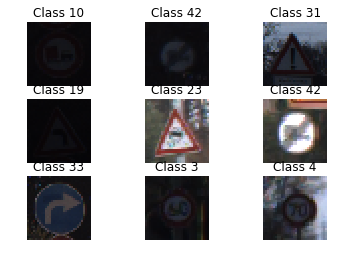

Continue? (y/n)y


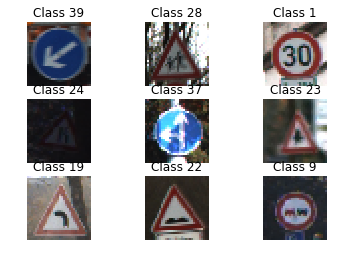

Continue? (y/n)y


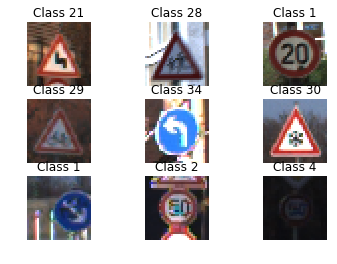

Continue? (y/n)n


In [24]:
model1('infer', '../images/test/')